# Multi-layer Neural Networks

McCulloch-Pitts networks and perceptrons are called single-layer networks becaues they do not contain a hidden layer. In order to accomplish more complicated tasks, we will have to work with multi-layer networks, which contain one or more hidden layers. This will also require a more complicated learning algorithm, called the backpropagation algorithm.

For this section, we will use a 3-3-1 network, that is a 3-layer network with 3 neurons in the input layer, 3 neurons in the hidden layer, and 1 neuron in the output. This is shown below.

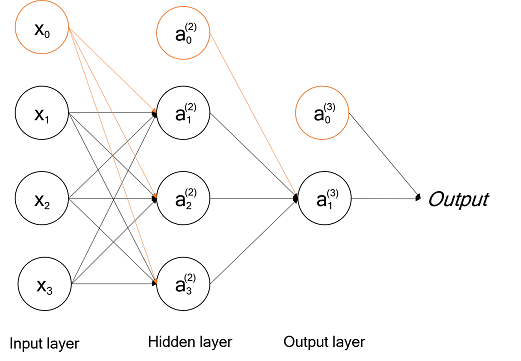

In [1]:
from IPython.display import Image
Image('multilayer1.png')

The orange circles are the bias units.  The number in the parenthesis superscript refer to the layer the unit is in. The input layer is understood to be layer 1.

## Forward Propagation

The idea of a multi-layer network is basically an extension of the single-layer one:
1. Sum the products of the weights and input.
2. Pass it through an **activation function** to get the activations $a_{1}^{(2)}, a_{2}^{(2)}, a_{3}^{(2)}$ in the hidden layer.
3. Sum the products of the weights and activations.
4. Pass it through an **activation function** to get the activation $a_{1}^{(3)}$.
5. Get the output!

These steps can also be called the **forward propagation**, because you are sending the values *forward* in the network.

Depending on the number of hidden layers, steps 2-4 might be repeated several times. Also note that $a_{0}=1$ for all layers. The activation function and activations will be explained more in the next section.

Let us look at the notation of the weights (it takes a bit to get used to). It's easier if you visualize it: click on each of the neurons to see how the weights are defined!

In [2]:
# some javascript here with clickable stuff

 As you see, the weight $w_{i,j}^{(l)}$ means the weight connecting neuron $i$ in the $(l+1)^{th}$ layer to the neuron $j$ in the $l^{th}$ layer. The neat part is that these indices correspond exactly to our weight matrix!
 
$$
 w^{(1)} = 
 \begin{bmatrix}
 w_{10}^{(1)} & w_{11}^{(1)} & w_{12}^{(1)} & w_{13}^{(1)}\\ 
 w_{20}^{(1)} & w_{21}^{(1)} & w_{22}^{(1)} & w_{23}^{(1)}\\ 
 w_{30}^{(1)} & w_{31}^{(1)} & w_{32}^{(1)} & w_{33}^{(1)}
\end{bmatrix}
$$

*Note: The rows start the indexing from 1, while the columns start the indexing from 0.*

For a single training example, $x$ is a vector defined as:
$$
x = 
\begin{bmatrix}
x_{0}\\ 
x_{1}\\ 
x_{2}\\ 
x_{3}
\end{bmatrix}
$$

By simply multiplying $w^{(1)}x$, we can obtain a vector containing the sum of products:
$$
 w^{(1)}x = 
 \begin{bmatrix}
 w_{10}^{(1)} & w_{11}^{(1)} & w_{12}^{(1)} & w_{13}^{(1)}\\ 
 w_{20}^{(1)} & w_{21}^{(1)} & w_{22}^{(1)} & w_{23}^{(1)}\\ 
 w_{30}^{(1)} & w_{31}^{(1)} & w_{32}^{(1)} & w_{33}^{(1)}
\end{bmatrix}
\times
\begin{bmatrix}
x_{0}\\ 
x_{1}\\ 
x_{2}\\ 
x_{3}
\end{bmatrix}
=
\begin{bmatrix}
w_{10}^{(1)}x_{0} + w_{11}^{(1)}x_{1} + w_{12}^{(1)}x_{2} + w_{13}^{(1)}x_{3}\\
w_{20}^{(1)}x_{0} + w_{21}^{(1)}x_{1} + w_{22}^{(1)}x_{2} + w_{23}^{(1)}x_{3}\\
w_{30}^{(1)}x_{0} + w_{31}^{(1)}x_{1} + w_{32}^{(1)}x_{2} + w_{33}^{(1)}x_{3}
\end{bmatrix}
=
\begin{bmatrix}
z_{1}^{(2)}\\
z_{2}^{(2)}\\
z_{3}^{(2)}
\end{bmatrix}
$$

We will use $z$ to define the sum of products of input and weights. We will have to pass these intermediate values $z$ through an activation function $g$ in order to get the activation values $a$. So, $a_{1}^{(2)} = g(z_{1}^{(2)})$. There are several activation functions available, but the **sigmoid function** will be introduced first.

## Sigmoid Function

For the perceptrons, we have made use of a simple learning algorithm using the step function (graph shown below).

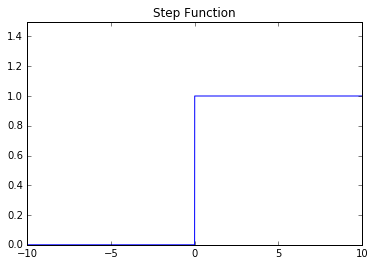

In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.001)
y = 0.5 * (np.sign(x) + 1)

plt.plot(x, y)
plt.axis([-10, 10, 0, 1.5])
plt.title('Step Function')
plt.show()

Since the output of the perceptrons (i.e. step function) can only be either 0 or 1, it would not be very practical in real-world applications. What we want instead is a small change in output whenever we have a small change in the weights. Therefore, the sigmoid function is an activation function that is commonly used. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

where $z = wx$

The graph of the sigmoid function is shown below.

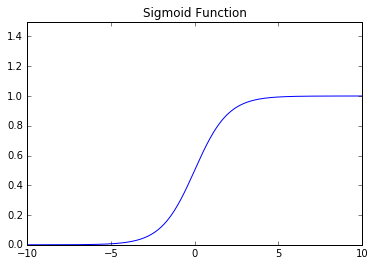

In [4]:
x = np.arange(-10, 10, 0.001)
y = 1/(1+np.exp(-x))

plt.plot(x, y)
plt.axis([-10, 10, 0, 1.5])
plt.title('Sigmoid Function')
plt.show()

So now, instead of just sending the sums of products $wx$ to the next layer, we will first pass it through the sigmoid function. We will denote this value as the activation $a$, that is, $a = g(wx)$.

Notice that for a very large positive number, $g(z)$ is approximately 1, and for a large negative number, $g(z)$ is approximately 0. So superficially, the sigmoid function behaves similarly to the step function for large numbers.

We will go into other activation functions later in the tutorial. For now, let us focus on the sigmoid function.

## The Cost Function

Let us recap what we know so far and try to look at the bigger picture before we go into the backpropagation algorithm.

As you know, for any neural network we are given a set of inputs and expected outputs which we can train the network with. Our goal is to find a set of weights that best fits the data, that is, a set of weights that gives a highest classification accuracy of the output. We can measure how good a set of weight 'fits' the data by using a cost function (also called an error function or a loss function). That is, a lower cost function corresponds to a lower error and thus, better performance of the network. **Our goal in training neural networks is to optimize the weights in such a way that the cost function (i.e. errors) is at a minimum.**

There are many cost functions available, but we are going to use the cross-entropy error function. It is defined as follows:

$$ J(z) = -y\log(g(z)) - (1-y)\log(1-(g(z)))$$

where $y$ is the actual output and $g(z)=g(wx)$ is our network's output.

Our multi-layer neural network outputs values from 0 to 1 according to the probability that something is a "yes" or "no." Think of a simple classification system in which we are trying to classify whether an image contains a person or not. Our network would output values close to 1 if it thinks the image contains a person, and close to 0 otherwise.

Let's say in a training example, the image contains a person, so the expected output is $y = 1$. You can see that the second term of the cost function, $(1-(1))\cdot \log(1-(g(z))$, disappears, and only the first term, $-(1)\cdot \log(g(z))$, is left. Let's see the graph of this.

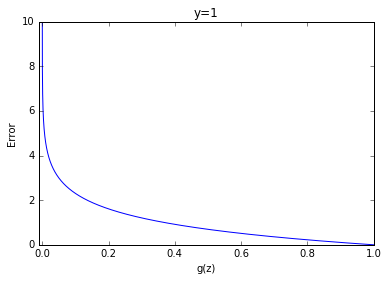

In [5]:
# Graph of -log(g(z))
x = np.arange(0.00001, 1, 0.00001)
y = -np.log(x)

plt.plot(x, y)
plt.xlabel('g(z)')
plt.ylabel('Error')
plt.axis([-0.01, 1, 0, 10])
plt.title('y=1')
plt.show()

Our network's output is on the x-axis. As you can observe, if $y=1$, the closer $g(z)$ is to 0, the higher the cost--the higher the error. This means that the weights are probably not very good. On the other hand, If $y=1$ and our network's output is also 1, the error would be 0.

Now let as look at the case where $y=0$: a training example that doesn't contain a person in the image. Now the first term of the cost function disappears, leaving only the term $-(1-(0))\cdot \log(1-(g(z))$. The graph of this is plotted below.

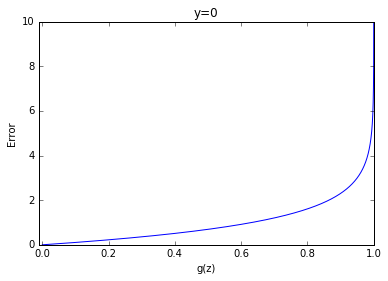

In [6]:
# Graph of -log(1-(g(z))
x = np.arange(0.00001, 1, 0.00001)
y = -np.log(1-x)

plt.plot(x, y)
plt.xlabel('g(z)')
plt.ylabel('Error')
plt.axis([-0.01, 1, 0, 10])
plt.title('y=0')
plt.show()

In a similar vein, if the network's output is 0, the error will be 0. However, the closer the network's output is to 1, the higher the error is.

To repeat, we'd like a set of weights that will minimize the error the entire training set. So actually, the function is also divided by the number of examples to get the average, and it becomes:

$$ J = -\frac{1}{N}\sum_{n=1}^{N}[-y\log(g(z)) - (1-y)\log(1-(g(z)))]$$

Now, let's see how we can optimize the weights!

## Gradient Descent

There are plenty of optimization algorithms, but the most common and essential one is called the *gradient descent*.

Essentially, a gradient is a vector of partial derivatives of a given function. Like its name suggests, the gradient descent algorithm uses the gradients of a function to find the local optima. The algorithm is as follows:

$$
\begin{align}
repeat \ until \ convergence: \\
\quad w_{j} := w_{j} - \alpha \frac{\partial J}{\partial w_{j}}
\end{align}
$$

Note: $\alpha$ is the learning rate - don't worry about that for now. 

All the weights are updated simultaneously using the partial derivative of the cost function with respect to the weight $w_{j}$. 

Let us try to have some intuition on how the gradient descent works. Suppose we have a bowl-shaped graph $J=w_{1}^{2}$ that is a function of only $w_{1}$ and we want to find the weight $w_{1}$ that gives us the minimum of the graph.

Try to input a number from [-3,3] and see the slope (colored red):

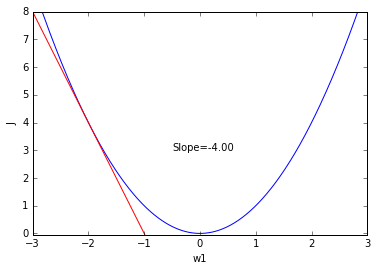

In [12]:
#################################
# Input any number from [-3, 3]
w = -2
#################################
w1 = np.arange(-3, 3, 0.01)
J = np.power(w1, 2)
slope = 2*w
y1 = w**2
y = slope*(w1-w) + y1

plt.text(-0.5,3,'Slope=%.2f' % slope)
plt.plot(w1, J, 'b', w1, y, 'r')
plt.xlabel('w1')
plt.ylabel('J')
plt.axis([-3, 3, -0.05, 8])
plt.show()

As you can observe, the slope is negative for a negative number and positive for a positive number. You can think of the slope as being the derivative.

Let's say we randomly initialize $w_{1}=2$ and we set $\alpha=0.1$. The slope $\frac{\partial J}{\partial w_{1}}=4$, a positive number. In the first gradient descent algorithm iteration, our new $w_{1}$ is computed as:

$ w_{1} = (2) - (0.1)(4) = 1.6 $

This means $w_{1}$ is moving closer to the minimum! If we repeat the algorithm enough times, it will eventually arrive at the minimum, which in this case is 0. To illustrate this a bit further:

Second iteration: $w_{1} = (1.6) - (0.1)(3.2) = 1.28 $

Third iteration: $w_{1} = (1.28) - (0.1)(2.56) = 1.024 $

...

And so on! We can set a small value $\epsilon$ to test for convergence: that is, if the difference between the $i^{th}$ iteration and $i+1^{th}$ iteration is less than $\epsilon$, the program terminates.

If we instead start off with a negative $w_{1}$, let's say $w_{1}=-2$. Then the slope $\frac{\partial J}{\partial w_{1}}=-4$, and our new value of $w_{1}$ is computed as:

$ w_{1} = (-2) - (0.1)(-4) = -1.6 $

As you can see, it still moves closer to the local minimum. The good part of this algorithm is even with thousands or tens of thousands of parameters, it still works!

To sum it up, **the gradient descent algorithm uses a function's partial derivatives to return parameter values that gives the function's local optimum.**

Next, we can find the partial derivatives of our neural network by using an algorithm called the **backpropagation algorithm**.

## Backpropagation

Backpropagation is fundamentally a technique for calculating derivatives quickly. It works by computing the derivative of the output with respect to ALL the input neurons. Let's repeat the neural network diagram again here.

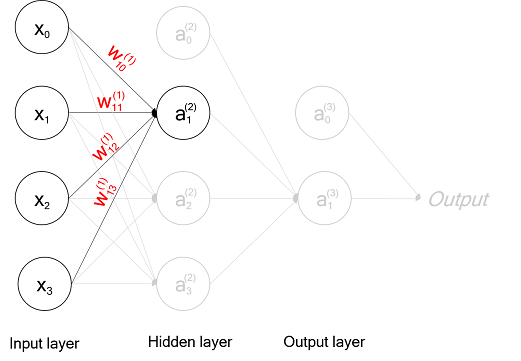

In [8]:
Image('multilayerw1.png')

Imagine perturbing weight $w_{10}^{(1)}$  slightly. This would also change the activation $a_{1}^{(2)}$, which would consequently change $a_{1}^{(3)}$, the output. What we want to know is how the output is affected by each individual weight, and we will again measure these changes using the cost function. In equation form, this is $ \frac{\partial J}{\partial w} $. (Recall that by knowing the partial derivatives, we can also use the gradient descent algorithm to optimize $w$.)

We can compute the derivative above by using the chain rule in calculus, which is basically what the backpropagation algorithm is.

### Backpropagation Equations

The backpropagation algorithm consists of three equations, one to find the partial derivative $ \frac{\partial J}{\partial w} $, and the other two to compute the error terms, which are denoted as $\delta\$.

The variable $\delta^{(l)}$ denotes the error in layer $l$. We can think of $J$ as the overall error of the network, and $\delta^{(l)}$ as the error in a single layer. Suppose we have a network with $L$ layers. Our approach would be to determine all the errors, that is, $\delta^{(L)}, \delta^{(L-1)}, \delta^{(L-2)}, \dots \delta^{(2)}$, and somehow relate this to the overall error $J$. (There is no $\delta^{(1)}$ because layer 1 is the input layer, and thus has no error.)

The partial derivative of the cost function with respect to the weights in layer $l$ is given as:

$$
\begin{equation}
\frac{\partial J}{\partial w^{(l)}} =  a^{(l)} \delta^{(l+1)}
\end{equation}
$$

**This equation is the very core of backpropagation!** In essence, we calculate the errors, starting from the final layer $L$, then we *backpropagate* the errors, sending it back through the network. We already know how to calculate all the activation values, so all we need now are equations for calculating $\delta$.

Let's first try to let that sink in with a simple visualization. 

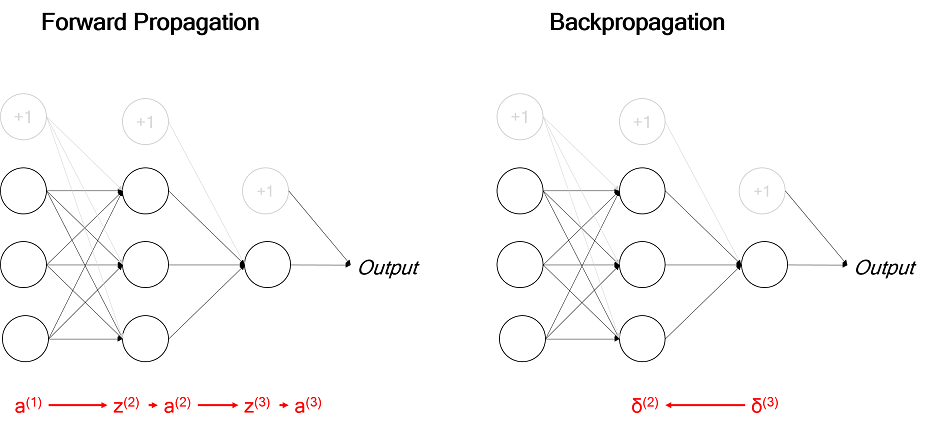

In [9]:
Image('fpbpcomparison.png')

The equations for computing the $\delta$ values are 

For the final layer $L$,
$$
\begin{equation}
\delta^{(L)} = a^{(L)}-y
\end{equation}
$$

where $y$ is the given correct output. This is quite intuitive to understand - the error in the final layer is simply the difference between the actual output and the predicted output.

For layer $l$,
$$
\begin{equation}
\delta^{(l)} = w^{(l)T} \delta^{(l+1)} \odot g'(z^{(l)})
\end{equation}
$$

where $\odot$ represents the elementwise multiplication of the matrix elements. *(Maybe have some more explanation here?)*

The derivations of these three equations can be found in the appendix. You may also want to check the Further Readings section, as they provide a more thorough and intuitive explanation.

##### Maybe add some more explanation/visualization here 

Finally, we can move on to the whole algorithm!

### Backpropagation Algorithm
Given a training example $(x, y)$, with y being the correct output

1. **Input:** Set $a^{(1)} = x$

2. **Forward propagation:** Compute activations $a^{(l)}$ for $l=2,3, \dots, L$

3. **Compute output error:** $\delta^{(L)} = a^{(L)} - y$

4. **Backpropagate the error:** Compute $\delta^{(L-1)}, \delta^{(L-2)}, \dots \delta^{(2)}$ using equation (3).

5. **Compute gradient(s):** $\frac{\partial J}{\partial w^{(l)}} =  a^{(l)} \delta^{(l+1)}$

For $m$ training examples, we loop all the steps then average the gradient over $\frac{1}{m}$.

Also note that for our sample neural network of 3 layers, we would need to compute two gradients, one for the $w^{(1)}$ (the weights connecting the input layer to the hidden layer), and another for $w^{(2)}$ (the weights connecting the hidden layer to the output layer).
!
Now let's see how we can put everything together to train our neural network!

## Learning algorithm for Neural Networks
Given a set of $m$ training examples:

1. Randomly initialize weights.
2. For each training example:
    - **Forward propagation** to compute activations $a^{(l)}$ for $l=2,3, \dots, L$.
    - **Backpropagation** to compute gradients (partial derivatives) $\frac{\partial J}{\partial w^{(l)}}$.
3. Use **gradient descent** (or other optimization algorithms) to minimize the cost function with parameters $w$.

This is the backbone of a general learning algorithm for neural networks. There are of course other details and ways you can improve this algorithm, such as cleverly initializing the weights, using regularization, using gradient checking, or using efficient optimization algorithms. These methods will be explained in the next lesson (if there is time).

The next section deals with a simple implementation of neural networks to perform nonlinear classification. The theory explained in this lesson will become more clear by then!

## References & Further Readings

- [A Basic Introduction to Neural Networks](http://www.webpages.ttu.edu/dleverin/neural_network/neural_networks.html)
- [Coursera: Machine Learning](https://www.coursera.org/learn/machine-learning)
- [Cross Entropy Error Function](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression)
- [Cost Function and Gradient Descent](http://cs231n.github.io/optimization-1/)
- [Neural Networks and Deep Learning: Chapter 2](http://neuralnetworksanddeeplearning.com/chap2.html)
- [Calculus on Computational Graphs: Backpropagation](http://colah.github.io/posts/2015-08-Backprop/)



## Appendix

# TO BE FIXED, PROBABLY LOTS OF MISTAKES
##### But my mind is not working anymore ;_;

### Derivation of equation (1)

Suppose we want to know how the cost function changes with respect to the weights in layer $l$. According to the chain rule:

$$ \frac{\partial J}{\partial w^{(l)}} = \frac{\partial J}{\partial a^{(l+1)}} \frac{\partial a^{(l+1)}}{\partial z^{(l+1)}} \frac{\partial z^{(l+1)}}{\partial w^{(l)}}$$

Take a look at the diagram above again. It makes sense that to know how, say, $w^{(1)}$ affects $J$, we must also know how it affects $z^{(2)}$ and subsequently $a^{(2)}$.


By definition the error in layer $l$ is the change in $J$ with respect to $z^{(l)}$. Recall that the value $z$ is the sum of products between the activations and weights of the previous layer, so $z^{(l+1)}$ can be written as $ z^{(l)} = w^{(l-1)}a^{(l-1)} $. So:

$$\delta^{(l)} = \frac{\partial J}{\partial z^{(l)}} = \frac{\partial J}{\partial a^{(l)}} \frac{\partial a^{(l)}}{\partial z^{(l)}}$$

We can extend this definition to layer $l+1$, 

$$\delta^{(l+1)} = \frac{\partial J}{\partial z^{(l+1)}} = \frac{\partial J}{\partial a^{(l+1)}} \frac{\partial a^{(l+1)}}{\partial z^{(l+1)}}$$

If you compare this to the first equation of the subsection, you can see that the first two terms can already be substituted with $\delta^{(l+1)}$! So let us rewrite the equation:

$$ \frac{\partial J}{\partial w^{(l)}} =  \delta^{(l+1)} \frac{\partial z^{(l+1)}}{\partial w^{(l)}}$$

Again, $ z^{(l+1)} = w^{(l)}a^{(l)} $. Derive it with respect to $w^{(l)}$, and you get that:

$$ \frac{\partial z^{(l+1)}}{\partial w^{(l)}} = a^{(l)} $$

Substite this in the equation, and we will get:

$$
\begin{equation}
\frac{\partial J}{\partial w^{(l)}} =  a^{(l)} \delta^{(l+1)}
\end{equation}
$$


### Derivation of equation (2)

By definition, the error in layer $L$ is the change in $J$ with respect to $z^{(L)}$ (with $z^{(L)} = w^{(L-1)}a^{(L-1)}$). So:

$$\delta^{(L)} = \frac{\partial J}{\partial z^{(L)}} = \frac{\partial J}{\partial a^{(L)}} \frac{\partial a^{(L)}}{\partial z^{(L)}}$$

by the chain rule. Since $a^{(L)}=g(z^{(L)})$,

$$\frac{\partial a^{(L)}}{\partial z^{(L)}} = g'(z^{(L)})$$

Now, we have equation (1):
$$
\begin{equation}
\delta^{L} = \frac{\partial J}{\partial a^{(L)}} g'(z^{(L)})
\end{equation}
$$

This is the most general form of $\delta^{L}$. For our case, with the sigmoid function $g(z)$ and cross-entropy loss function, $\delta^{L}$ becomes:

$$
\begin{equation}
\delta^{L} = a^{(L)}-y
\end{equation}
$$

where $y$ is the given correct output. The derivation of this is in the next subsection, in case you are interested.

### Derivation of the sigmoid function

### Derivation of the cross-entropy loss function derivative


### Derivation of equation (3) [Really needs to be fixed, I think it's wrong]

Again, by definition:

$$\delta^{(l)} = \frac{\partial J}{\partial z^{(l)}} = \frac{\partial J}{\partial z^{(l+1)}} \frac{\partial z^{(l+1)}}{\partial z^{(l)}}$$

The first term can be written as:
$$ \frac{\partial J}{\partial z^{(l+1)}} = \delta^{(l+1)}$$


And for the second term, $z^{(l+1)} = w^{(l)}a^{(l)} = w^{(l)}g(z^{(l)})$. So
$$\frac{\partial z^{(l+1)}}{\partial z^{(l)}} = w^{(l)}g'(z^{(l)})$$

We rearrange the equations, giving rise to:

$$\delta^{(l)} = w^{(l)T} \delta^{(l+1)} \odot g'(z^{(l)})$$

In [10]:
# This enables the rendering of equation numbers
from IPython.display import HTML
js = r""" <script type="text/Javascript"> MathJax.Hub.Config({ TeX: { equationNumbers: { autoNumber: "AMS", useLabelIds: true } }});
</script> """
HTML(js)